<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#本项目需解决的问题" data-toc-modified-id="本项目需解决的问题-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>本项目需解决的问题</a></span></li><li><span><a href="#场景解析-(算法选择)" data-toc-modified-id="场景解析-(算法选择)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>场景解析 (算法选择)</a></span></li><li><span><a href="#分析步骤:" data-toc-modified-id="分析步骤:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>分析步骤:</a></span></li><li><span><a href="#数据预处理" data-toc-modified-id="数据预处理-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>数据预处理</a></span></li><li><span><a href="#特征抽象" data-toc-modified-id="特征抽象-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>特征抽象</a></span></li><li><span><a href="#其他数据类型转数值化处理" data-toc-modified-id="其他数据类型转数值化处理-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>其他数据类型转数值化处理</a></span></li><li><span><a href="#设计模型(逻辑斯梯)`" data-toc-modified-id="设计模型(逻辑斯梯)`-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>设计模型(逻辑斯梯)`</a></span></li><li><span><a href="#优化模型TPR,FPR----K折交叉验证,权重系数" data-toc-modified-id="优化模型TPR,FPR----K折交叉验证,权重系数-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>优化模型TPR,FPR -- K折交叉验证,权重系数</a></span></li><li><span><a href="#计算AUC,ROC-可视化显示" data-toc-modified-id="计算AUC,ROC-可视化显示-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>计算AUC,ROC 可视化显示</a></span></li></ul></div>

# 本项目需解决的问题
    本项目通过利用P2P平台Lending Club的贷款数据，进行机器学习，构建贷款违约预测模型，对新增贷款申请人进行预测是否会违约，从而决定是否放款。# 数据 https://www.lendingclub.com/info/download-data.action

# 场景解析 (算法选择)
    贷款申请人向Lending Club平台申请贷款时，Lending Club平台通过线上或线下让客户填写贷款申请表，收集客户的基本信息，这里包括申请人的年龄、性别、婚姻状况、学历、贷款金额、申请人财产情况等信息，通常来说还会借助第三方平台如征信机构或FICO等机构的信息。通过这些信息属性来做线性回归 ，生成预测模型，Lending Club平台可以通过预测判断贷款申请是否会违约，从而决定是否向申请人发放贷款。

1）首先，我们的场景是通过用户的历史行为（如历史数据的多维特征和贷款状态是否违约）来训练模型，通过这个模型对新增的贷款人“是否具有偿还能力，是否具有偿债意愿”进行分析，预测贷款申请人是否会发生违约贷款。这是一个监督学习的场景，因为已知了特征以及贷款状态是否违约（目标列），我们判定贷款申请人是否违约是一个二元分类问题，可以通过一个分类算法来处理，这里选用逻辑斯蒂回归（Logistic Regression）。

2）观察数据集发现部分数据是半结构化数据，需要进行特征抽象。

    现对该业务场景进行总结如下：
  
    根据历史记录数据学习并对贷款是否违约进行预测，监督学习场景，选择逻辑斯蒂回归（Logistic Regression）算法。


# 分析步骤:
数据预处理
数据的清洗  
特征的筛选  
特征值的标准化,数值化   
模型训练  
逻辑回归  
随机森林  
计算tpr fpr  



#  数据预处理
去除空值较多的值,去除重复,无关值

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
loans_2007 = pd.read_csv('LoanStats3a.csv',skiprows=1)

In [3]:
loans_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(86), object(25)
memory usage: 36.0+ MB


从上述的信息中可以看出：

1.42538行数据，52个特征变量

2.52个特征变量中有30个是浮点数类型，22个是Object对象。

info()函数获取到的信息还是太少，接下来可以通过下面的方法，得到数值型数据和Object基类的数据分布。

In [4]:
loans_2007.select_dtypes(include=['O']).describe().T\
    .assign(missing_pct=loans_2007.apply(lambda x : (len(x)-x.count())/len(x)))

,count,unique,top,freq,missing_pct
id,42538,42538,387039,1,0.000000
term,42535,2,36 months,31534,0.000071
int_rate,42535,394,10.99%,970,0.000071
grade,42535,7,B,12389,0.000071
sub_grade,42535,35,B3,2997,0.000071
emp_title,39909,30658,US Army,139,0.061804
emp_length,41423,11,10+ years,9369,0.026212
home_ownership,42535,5,RENT,20181,0.000071
verification_status,42535,3,Not Verified,18758,0.000071
issue_d,42535,55,Dec-2011,2267,0.000071


筛选出object对象的对应信息，可分别得到非空值数量、unique数量，最大频数变量，最大频数，以及新添加一列特征变量missing_pct，表示值缺失的比重。

从图表中可以得到部分信息：

1.贷款共7个等级，占比最多的是B级

2.还款的形式有两种，占比最多的是36个月

3.贷款人中大多数人工龄10+年

4.贷款人的房屋状况大多是抵押贷款

5.大多数人贷款的目的是债务整合

6.id与desc特征的数据缺失率高达0.99，间接表明这两个特征可以删除掉。

同样可以按照这种方式对浮点型的数据进行数据预览，得到均值、标准差、四分位数以及数据的缺失比重等信息。

空值、异常值处理

得到上述的信息后，我们可以根据缺失比重进行数据的清洗。在这里按照50%的阈值删除数据。

原始数据集存在异常值情况，如特征变量emp_length（工龄）数据中包含‘n/a’的数据，产生原因为公式应用的错误无法找到原值，而且占比较小，清除数据。

除去异常值，还包括对空值的处理，对于较为重要的特征来说，如果缺失值占比较小，可以通过填补均值进行处理。

In [5]:
# 按阈值去除空值,一些描述'desc','url' 无用得值

half_count = len(loans_2007)/2
loans_2007 = loans_2007.dropna(thresh = half_count,axis = 1)
loans_2007 = loans_2007.drop(['desc','url'],axis = 1)
loans_2007.to_csv('loans_2007.csv',index=False)


In [6]:
# 去除重复值,并iloc查看第一行有哪些特征,和总样本数
import pandas as pd
loans_2007 = pd.read_csv("loans_2007.csv")
loans_2007.drop_duplicates()
print(loans_2007.iloc[0])
print(loans_2007.shape[1])

id                                1077501
member_id                      1.2966e+06
loan_amnt                            5000
funded_amnt                          5000
funded_amnt_inv                      4975
term                            36 months
int_rate                           10.65%
installment                        162.87
grade                                   B
sub_grade                              B2
emp_title                             NaN
emp_length                      10+ years
home_ownership                       RENT
annual_inc                          24000
verification_status              Verified
issue_d                          Dec-2011
loan_status                    Fully Paid
pymnt_plan                              n
purpose                       credit_card
title                            Computer
zip_code                            860xx
addr_state                             AZ
dti                                 27.65
delinq_2yrs                       

In [6]:
# 具体特征含义
# id                                1077501  # 贷款清单的唯一LC分配ID
# member_id                      1.2966e+06  # 为借款人成员分配的唯一LC。
# loan_amnt                            5000  # 申请贷款数
# funded_amnt                          5000  # 在该时间点承诺给该贷款的总金额。
# funded_amnt_inv                      4975  # 投资者在该时间点为该贷款承诺的总金额。
# term                            36 months  # 偿还贷款的日期
# int_rate                           10.65%  # 贷款利率
# installment                        162.87  # 如果贷款来自借款人的每月付款
# grade                                   B  # 信用证转让贷款等级
# sub_grade                              B2  # 信用证指导贷款基准
# emp_title                             NaN  # 受雇佣公司
# emp_length                      10+ years  # 雇佣时间
# home_ownership                       RENT  # 贷款者居住房屋的所有权(租房,买房,按揭,其他)
# annual_inc                          24000  # 年收入
# verification_status              Verified  # 收入由信用证核实
# issue_d                          Dec-2011  # 贷款日期
# loan_status                    Fully Paid  # 贷款的状态(贷款状态）来描述当前贷款处于什么状态，其中包括Current、Fully Paid、Charged Off（注销）、Default、In Grace Period（在宽限期）、Late (16-30 days)（延期16-30天） 、Late (31-120 days)（延期31-120天）这几种状态)
# pymnt_plan                              n  # 指示是否已为贷款制定付款计划
# purpose                       credit_card  # 借款人为贷款请求提供的类别,即贷款目的。
# title                            Computer  # 借款人提供的贷款用途
# zip_code                            860xx  #借款人在贷款申请中提供的前三个邮政编码号码。
# addr_state                             AZ  # 借款人在贷款申请中提供的地址
# dti                                 27.65  # 以借款人每月债务总额计算的债务总额(不包括抵押贷款和要求的信用证贷款)除以借款人自报每月收入的比率。
# delinq_2yrs                             0  # 借款人过去2年的信用记录中超过30天的逾期未付事故率
# earliest_cr_line                 Jan-1985  # 借款人最早报告的信用额度开放日期
# inq_last_6mths                          1  # 过去6个月的查询次数(不包括汽车及按揭查询)
# open_acc                                3  # 过去得交易数目
# pub_rec                                 0  # 不良公共记录的数量
# revol_bal                           13648  # 信贷循环余额总额
# revol_util                          83.7%  # 循环线使用率，或借款人使用的信贷金额相对于所有可用的循环信贷。
# total_acc                               9  # 借款人信用档案中当前的信用额度总数
# initial_list_status                     f  # 贷款的初始上市状态。 可能的值为 - W，F
# out_prncp                               0  # 总资金中剩余的未偿还本金
# out_prncp_inv                           0  # 由投资者资助的总金额的剩余未偿还本金
# total_pymnt                       5863.16  # 到目前为止收到的付款总额
# total_pymnt_inv                   5833.84  # 迄今为止收到的由投资者资助的部分总金额
# total_rec_prncp                      5000  # 迄今收到的本金
# total_rec_int                      863.16  # 迄今收到的利息
# total_rec_late_fee                      0  # 到目前为止收到的滞纳金
# recoveries                              0  # 回收率
# collection_recovery_fee                 0  # 收取得手续费
# last_pymnt_d                     Jan-2015  # 上个月收到付款
# last_pymnt_amnt                    171.62  # 上次收到的总付款金额
# last_credit_pull_d               Nov-2016  # 最近一个月，LC为这笔贷款提供了信贷
# collections_12_mths_ex_med              0  # 除医疗收集外12个月的馆藏数量
# policy_code                             1  # 公开的policy_code = 1个新产品不公开policy_code = 2
# application_type               INDIVIDUAL  # 申请类型
# acc_now_delinq                          0  # 借款人现在欠款的账户数量。
# chargeoff_within_12_mths                0  # 12个月内的冲销金额
# delinq_amnt                             0  # 借方逾期未还的欠款。
# pub_rec_bankruptcies                    0  # 公开破产个案数目
# tax_liens                               0  # 税务留置权数量
# Name: 0, dtype: object
# 52
# 数据
# https://www.lendingclub.com/info/download-data.action
# 数据字段含义
# https://www.kesci.com/home/dataset/58a7fab4fbe7a30f28357645

In [7]:
#贷款等级Object类型转为数值类型
grade = loans_2007['grade'].replace('A',1)
grade = grade.replace('B',2)
grade = grade.replace('C',3)
grade = grade.replace('D',4)
grade = grade.replace('E',5)
grade = grade.replace('F',6)
grade = grade.replace('G',7)
# 数值映射,规范化数据为数值型 
grade_dict = {
    "grade": {
        "G": 7,
        "F": 6,
        "E": 5,
        "D": 4,
        "C": 3,
        "B": 2,
        "A": 1,
        "A": 0,
    }
}
loans_2007 = loans_2007.replace(grade_dict)


In [8]:
loans_2007['grade']

0        2.0
1        3.0
2        3.0
3        3.0
4        2.0
5        0.0
6        3.0
7        5.0
8        6.0
9        2.0
10       3.0
11       2.0
12       3.0
13       2.0
14       2.0
15       4.0
16       3.0
17       0.0
18       2.0
19       0.0
20       3.0
21       2.0
22       2.0
23       2.0
24       2.0
25       2.0
26       3.0
27       4.0
28       2.0
29       2.0
        ... 
42508    4.0
42509    4.0
42510    2.0
42511    5.0
42512    0.0
42513    3.0
42514    2.0
42515    2.0
42516    3.0
42517    3.0
42518    5.0
42519    0.0
42520    0.0
42521    0.0
42522    0.0
42523    0.0
42524    3.0
42525    4.0
42526    3.0
42527    2.0
42528    2.0
42529    2.0
42530    2.0
42531    3.0
42532    2.0
42533    2.0
42534    0.0
42535    0.0
42536    NaN
42537    NaN
Name: grade, Length: 42538, dtype: float64

In [9]:
# 去除与模型预测无关的特征(去除唯一属性： 如id属性，自增列，含唯一值的列，这些属性并不能描述本身的分布规律。)
loans_2007 = loans_2007.drop(["id", "member_id", "funded_amnt", "funded_amnt_inv", "grade", "sub_grade", "emp_title", "issue_d"], axis=1)


In [10]:
# 再次去除与模型无关的特征(预测之后发生的事情去掉)
loans_2007 = loans_2007.drop(["zip_code", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp"], axis=1)

In [11]:

loans_2007 = loans_2007.drop(["total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt"], axis=1)
print(loans_2007.iloc[0])
print(loans_2007.shape[1])

loan_amnt                            5000
term                            36 months
int_rate                           10.65%
installment                        162.87
emp_length                      10+ years
home_ownership                       RENT
annual_inc                          24000
verification_status              Verified
loan_status                    Fully Paid
pymnt_plan                              n
purpose                       credit_card
title                            Computer
addr_state                             AZ
dti                                 27.65
delinq_2yrs                             0
earliest_cr_line                 Jan-1985
inq_last_6mths                          1
open_acc                                3
pub_rec                                 0
revol_bal                           13648
revol_util                          83.7%
total_acc                               9
initial_list_status                     f
last_credit_pull_d               N

经过数据预处理现剩余32个特征

# 特征抽象 
在众多特征中，有个特征变量loan_status（贷款状态）来描述当前贷款处于什么状态，其中包括Current、Fully Paid、Charged Off（注销）、Default、In Grace Period（在宽限期）、Late (16-30 days)（延期16-30天） 、Late (31-120 days)（延期31-120天）这几种状态。

In [12]:
#查看目标值
print(loans_2007['loan_status'].value_counts())

Fully Paid                                             33902
Charged Off                                             5658
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  201
Late (31-120 days)                                        10
In Grace Period                                            9
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64


In [13]:
# 目标值映射
loans_2007 = loans_2007[(loans_2007['loan_status'] == "Fully Paid") | (loans_2007['loan_status'] == "Charged Off")]

status_replace = {
    "loan_status" : {
        "Fully Paid": 1,
        "Charged Off": 0,
    }
}

loans_2007 = loans_2007.replace(status_replace)

In [14]:
loans_status_counts  = loans_2007['loan_status'].value_counts()
loans_status_counts

1    33902
0     5658
Name: loan_status, dtype: int64

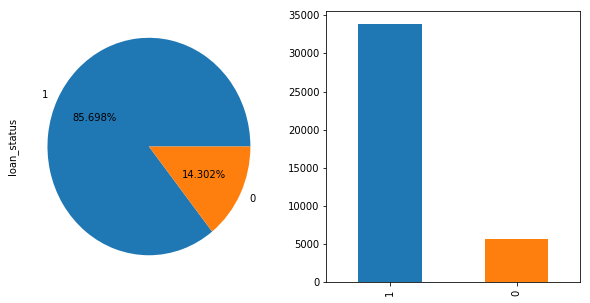

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
# 贷款状态
plt.figure(figsize=(10,5))
# 饼图
ax = plt.subplot(1,2,1)
loans_status_counts.plot(kind = 'pie',autopct = '%0.3f%%',ax = ax)

# 柱状图
ax = plt.subplot(1,2,2)
loans_status_counts.plot(kind = 'bar',ax = ax)

In [16]:
# 让我们查找任何只包含一个惟一值的列并删除它们,因为都一样对预测结果无影响

orig_columns = loans_2007.columns
drop_columns = []
for col in orig_columns:
    col_series = loans_2007[col].dropna().unique()
    if len(col_series) == 1:
        drop_columns.append(col)
loans_2007 = loans_2007.drop(drop_columns, axis=1)
print(drop_columns)
print (loans_2007.shape)
loans_2007.to_csv('filtered_loans_2007.csv', index=False)

['initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']
(39560, 24)


In [17]:
# 查看过滤后的数据是否还有空值
import pandas as pd
loans = pd.read_csv('filtered_loans_2007.csv')
null_counts = loans.isnull().sum()
print(null_counts)

loan_amnt                  0
term                       0
int_rate                   0
installment                0
emp_length              1073
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
pymnt_plan                 0
purpose                    0
title                     11
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64


In [18]:
loans.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

 # 其他数据类型转数值化处理

In [19]:
# 查看数据的数据类型
loans = loans.drop("pub_rec_bankruptcies", axis=1)
loans = loans.dropna(axis=0)

print(loans.dtypes.value_counts())

object     12
float64    10
int64       1
dtype: int64


In [20]:
# 查看具体哪些数值维object
object_columns_df = loans.select_dtypes(include=["object"])
print(object_columns_df.iloc[0])

term                     36 months
int_rate                    10.65%
emp_length               10+ years
home_ownership                RENT
verification_status       Verified
pymnt_plan                       n
purpose                credit_card
title                     Computer
addr_state                      AZ
earliest_cr_line          Jan-1985
revol_util                   83.7%
last_credit_pull_d        Nov-2016
Name: 0, dtype: object


In [21]:
cols = ['home_ownership', 'verification_status', 'emp_length', 'term', 'addr_state']
for c in cols:
    print(loans[c].value_counts())

RENT        18371
MORTGAGE    17131
OWN          2827
OTHER          96
NONE            3
Name: home_ownership, dtype: int64
Not Verified       16436
Verified           12251
Source Verified     9741
Name: verification_status, dtype: int64
10+ years    8821
< 1 year     4563
2 years      4371
3 years      4074
4 years      3409
5 years      3270
1 year       3227
6 years      2212
7 years      1756
8 years      1472
9 years      1253
Name: emp_length, dtype: int64
 36 months    28234
 60 months    10194
Name: term, dtype: int64
CA    6882
NY    3684
FL    2766
TX    2659
NJ    1814
IL    1480
PA    1470
VA    1371
GA    1352
MA    1306
OH    1177
MD    1030
AZ     828
WA     800
CO     764
NC     754
CT     728
MI     688
MO     658
MN     589
NV     477
SC     462
WI     439
OR     431
AL     429
LA     425
KY     321
OK     292
KS     258
UT     251
AR     233
DC     211
RI     196
NM     182
HI     168
WV     167
NH     162
DE     110
WY      79
MT      78
AK      77
SD      62
VT  

In [22]:
print(loans["purpose"].value_counts())
print(loans["title"].value_counts())

debt_consolidation    18137
credit_card            4970
other                  3803
home_improvement       2869
major_purchase         2108
small_business         1771
car                    1492
wedding                 932
medical                 667
moving                  557
house                   365
vacation                350
educational             312
renewable_energy         95
Name: purpose, dtype: int64
Debt Consolidation                          2128
Debt Consolidation Loan                     1671
Personal Loan                                640
Consolidation                                503
debt consolidation                           483
Credit Card Consolidation                    348
Home Improvement                             344
Debt consolidation                           323
Small Business Loan                          310
Credit Card Loan                             302
Personal                                     296
Consolidation Loan                       

In [23]:
# 数值映射,规范化数据为数值型 
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0
    }
}
loans = loans.drop(["last_credit_pull_d", "earliest_cr_line", "addr_state", "title"], axis=1)
loans["int_rate"] = loans["int_rate"].str.rstrip("%").astype("float")
loans["revol_util"] = loans["revol_util"].str.rstrip("%").astype("float")
loans = loans.replace(mapping_dict)

In [24]:
# 用get_dummies进行one-hot编码
cat_columns = ["home_ownership", "verification_status", "emp_length", "purpose", "term"]
dummy_df = pd.get_dummies(loans[cat_columns])
loans = pd.concat([loans, dummy_df], axis=1)
loans = loans.drop(cat_columns, axis=1)
loans = loans.drop("pymnt_plan", axis=1)

In [25]:
loans.to_csv('cleaned_loans2007.csv', index=False)


In [26]:

loans = pd.read_csv("cleaned_loans2007.csv")
loans.isnull().any()

loan_amnt                              False
int_rate                               False
installment                            False
annual_inc                             False
loan_status                            False
dti                                    False
delinq_2yrs                            False
inq_last_6mths                         False
open_acc                               False
pub_rec                                False
revol_bal                              False
revol_util                             False
total_acc                              False
home_ownership_MORTGAGE                False
home_ownership_NONE                    False
home_ownership_OTHER                   False
home_ownership_OWN                     False
home_ownership_RENT                    False
verification_status_Not Verified       False
verification_status_Source Verified    False
verification_status_Verified           False
purpose_car                            False
purpose_cr

In [88]:
# 确认处理完的数据是否全为数值型
import pandas as pd
loans = pd.read_csv("cleaned_loans2007.csv")
print(loans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38428 entries, 0 to 38427
Data columns (total 37 columns):
loan_amnt                              38428 non-null float64
int_rate                               38428 non-null float64
installment                            38428 non-null float64
annual_inc                             38428 non-null float64
loan_status                            38428 non-null int64
dti                                    38428 non-null float64
delinq_2yrs                            38428 non-null float64
inq_last_6mths                         38428 non-null float64
open_acc                               38428 non-null float64
pub_rec                                38428 non-null float64
revol_bal                              38428 non-null float64
revol_util                             38428 non-null float64
total_acc                              38428 non-null float64
home_ownership_MORTGAGE                38428 non-null int64
home_ownership_NONE        

# 设计模型(逻辑斯梯)`

In [29]:
import pandas as pd
# False positives.
fp_filter = (predictions == 1) & (loans["loan_status"] == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (loans["loan_status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])
# display(fp_filter,fp,tp_filter,tp,fn_filter,fn,tn_filter,tn)

In [28]:
# 逻辑斯梯

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
cols = loans.columns
train_cols = cols.drop("loan_status")
# 训练值
features = loans[train_cols]
# 目标值
target = loans["loan_status"]
# 算法训练
lr.fit(features,target)
# 预测目标值
predictions = lr.predict(features)

print(predictions)

[1 1 1 ... 1 1 1]


In [30]:
#  随机森林
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_predict,KFold
rf = RandomForestClassifier(n_estimators=10,class_weight="balanced", random_state=1)
#print help(RandomForestClassifier)
kf = KFold(features.shape[0], random_state=1)
predictions = cross_val_predict(rf, features, target, cv=kf)
predictions = pd.Series(predictions)

# False positives.
fp_filter = (predictions == 1) & (loans["loan_status"] == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (loans["loan_status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])

# Rates
tpr = tp / float((tp + fn))
fpr = fp / float((fp + tn))
print(tpr)
print(fpr)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.9744071236029924
0.9414156348179634


In [31]:
# 随机森林--K折交叉验证
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import  cross_val_predict,KFold
lr = LogisticRegression(class_weight="balanced")

kf = KFold(features.shape[0],random_state = 1)
predictions = cross_val_predict(lr,features,target,cv = kf)
predictions = pd.Series(predictions)

# False positives.
fp_filter = (predictions == 1) & (loans["loan_status"] == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 0) & (loans["loan_status"] == 1)
fn = len(predictions[fn_filter])

# True negative.
tn_filkter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])

# Rates 
tpr = tp / float((tp + fn))
fpr = fp / float((fp + tn))

print(tpr) 
print(fpr)
print (predictions[:20])


0.9744071236029924
0.8719191919191919
0     1
1     0
2     0
3     1
4     1
5     0
6     0
7     0
8     0
9     0
10    1
11    0
12    1
13    1
14    0
15    0
16    1
17    1
18    1
19    0
dtype: int64


# 优化模型TPR,FPR -- K折交叉验证,权重系数

In [32]:
# 逻辑斯梯- - 因样本不均衡 ,设置权重不同
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_predict,KFold

penalty = {
    0: 5,
    1: 1
}

lr = LogisticRegression(class_weight=penalty)
kf = KFold(features.shape[0], random_state=1)
predictions = cross_val_predict(lr, features, target, cv=kf)
print(predictions)
predictions = pd.Series(predictions)
print("****")
print(predictions)
print("*****")
# False positives.
fp_filter = (predictions == 1) & (loans["loan_status"] == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (loans["loan_status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])

# Rates
tpr = tp / float((tp + fn))
fpr = fp / float((fp + tn))

print(tpr)
print(fpr)

[1 0 0 ... 1 1 1]
****
0        1
1        0
2        0
3        1
4        1
5        0
6        0
7        0
8        0
9        1
10       1
11       0
12       0
13       1
14       0
15       1
16       1
17       1
18       1
19       0
20       1
21       1
22       1
23       1
24       1
25       1
26       0
27       1
28       0
29       1
        ..
38398    1
38399    1
38400    0
38401    1
38402    0
38403    1
38404    1
38405    1
38406    1
38407    1
38408    1
38409    1
38410    1
38411    1
38412    1
38413    1
38414    1
38415    1
38416    1
38417    1
38418    1
38419    1
38420    1
38421    1
38422    1
38423    1
38424    1
38425    1
38426    1
38427    1
Length: 38428, dtype: int64
*****
0.7449192840052095
0.5067455183884679


In [33]:
# 随机森林- K折交叉验证
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_predict
rf = RandomForestClassifier(n_estimators=10,class_weight="balanced", random_state=1)
#print help(RandomForestClassifier)
kf = KFold(features.shape[0], random_state=1)
predictions = cross_val_predict(rf, features, target, cv=kf)
predictions = pd.Series(predictions)

# False positives.
fp_filter = (predictions == 1) & (loans["loan_status"] == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (loans["loan_status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])

# Rates
tpr = tp / float((tp + fn))
fpr = fp / float((fp + tn))

print(tpr)
print(fpr)

0.9744071236029924
0.9414156348179634


In [34]:
# 随机森林 --调节权重
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_predict


penalty = {
    0: 5,
    1: 1
}
rf = RandomForestClassifier(n_estimators=1000,class_weight=penalty, random_state=1)
#print help(RandomForestClassifier)
kf = KFold(features.shape[0], random_state=1)
predictions = cross_val_predict(rf, features, target, cv=kf)
predictions = pd.Series(predictions)

# False positives.
fp_filter = (predictions == 1) & (loans["loan_status"] == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (loans["loan_status"] == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (loans["loan_status"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (loans["loan_status"] == 0)
tn = len(predictions[tn_filter])

# Rates
tpr = tp / float((tp + fn))
fpr = fp / float((fp + tn))

print(tpr)
print(fpr)

0.9992731017354696
0.9985215302162262


总结: 针对特征数量较少的,随机森林,耗时较长,算法不如逻辑斯梯效率高  
针对模型的好坏:在某些情况中，我们也许需要以牺牲另一个指标为代价来最大化精度(精确率)或者召回率。
例如，在金融危机时，我们可能希望得到接近于 1 的召回率—我们想
找到所有可能违约人。
但如果代价不是很高，我们可以接受较低的精度。然而，如果我们想要找到精度(精确率)和召回率的最佳
组合，我们可以使用 F1 score 来对两者进行结合。
F1=（1+a2）*precision*recall/（a*precision+recall）
a2是a的平方，一般默认a= 1

# 计算AUC,ROC 可视化显示

In [35]:
from sklearn.metrics import roc_curve, auc  ###计算roc和auc  
import matplotlib.pyplot as plt  
%matplotlib inline

In [36]:
# 逻辑斯梯
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
cols = loans.columns
train_cols = cols.drop("loan_status")
# 训练值
features = loans[train_cols]
# 目标值
target = loans["loan_status"]
# 算法训练
lr.fit(features,target)
# 预测目标值
predictions = lr.predict(features)

In [37]:
features.shape[0]

38428

In [38]:
# 逻辑斯梯- - 因样本不均衡 ,设置权重不同  借用第三方库实现ROC
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score

penalty = {
    0: 5,
    1: 1
}

kf = KFold(features.shape[0], random_state=1)
lr = LogisticRegression(class_weight=penalty)
# predictions = cross_val_predict(lr, features, target, cv=kf)
accuracies = cross_val_score(lr, features, target,scoring = "accuracy", cv=kf)
# accuracies = cross_val_score(lr, features, target,scoring = "roc_auc", cv=kf)
average_accuracy = sum(accuracies) / len(accuracies)

print(accuracies)

print(str(average_accuracy) + "###")


# print(predictions)
# predictions = pd.Series(predictions)
# print("****")
# print(predictions)
# print("*****")

[0.68290398 0.6701538  0.7753923 ]
0.7094833605542649###


In [39]:
from sklearn.metrics import roc_auc_score
lr.fit(features,target)
probabilities = lr.predict_proba(features)

# Means we can just use roc_auc_curve() instead of metrics.roc_auc_curve()
auc_score = roc_auc_score(target, probabilities[:,1])
print(auc_score)

0.6928901962305704


[1.         0.99950139 0.99910466 ... 0.1461508  0.1395978  0.12643783]


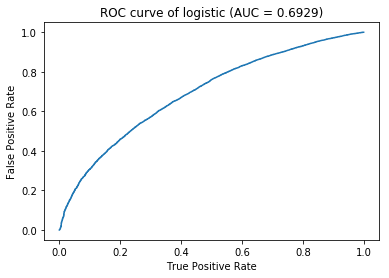

In [40]:

import matplotlib.pyplot as plt
from sklearn import metrics

probabilities = lr.predict_proba(features)
fpr, tpr, thresholds = metrics.roc_curve(target, probabilities[:,1])
print (thresholds)
plt.plot(fpr, tpr)
plt.title("ROC curve of %s (AUC = %.4f)" % ('logistic' , auc_score))
plt.ylabel("False Positive Rate")
plt.xlabel("True Positive Rate")
plt.show()